In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [65]:
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
titanic.shape

(891, 12)

In [67]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [71]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
titanic_data_filled = titanic.copy()

# Separate numerical and categorical columns

numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns

categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns


# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])



# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])



# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Survival Count:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


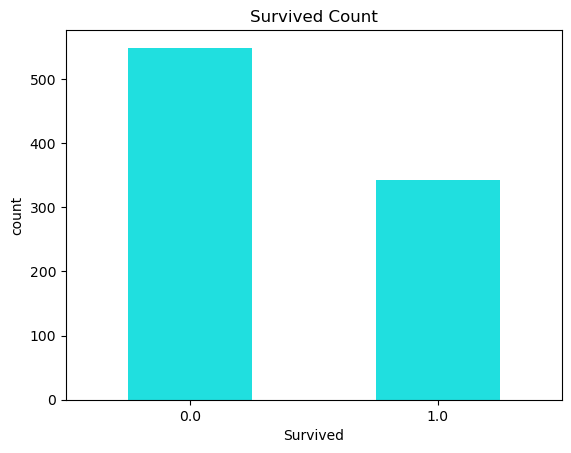

In [73]:
# Analyze 'Survived'

print("\nSurvival Count:\n", titanic_data_filled['Survived'].value_counts())

sns.countplot(x = 'Survived', data = titanic_data_filled, width = 0.5, color = "cyan")

plt.title('Survived Count')

plt.show()


Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


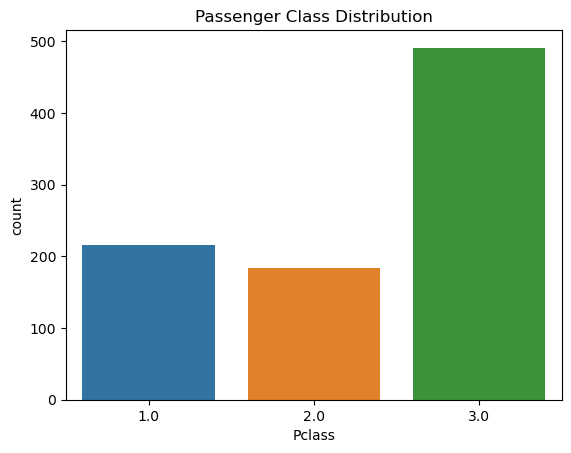

In [74]:
# Analyze 'Pclass'

print("\nPclass Distribution:\n", titanic_data_filled['Pclass'].value_counts())

sns.countplot(x = 'Pclass', data = titanic_data_filled)

plt.title('Passenger Class Distribution')

plt.show()


Age Statistics:
 count    891.000000
mean      29.596620
std       13.689368
min        0.420000
25%       21.185000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


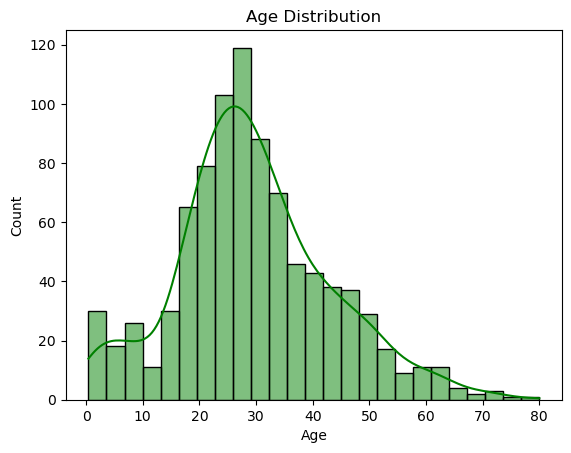

In [75]:
# Analyze 'Age'

print("\nAge Statistics:\n", titanic_data_filled['Age'].describe())

sns.histplot(x = 'Age', data = titanic_data_filled, kde=True, color = "green")

plt.title('Age Distribution')

plt.show()


Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


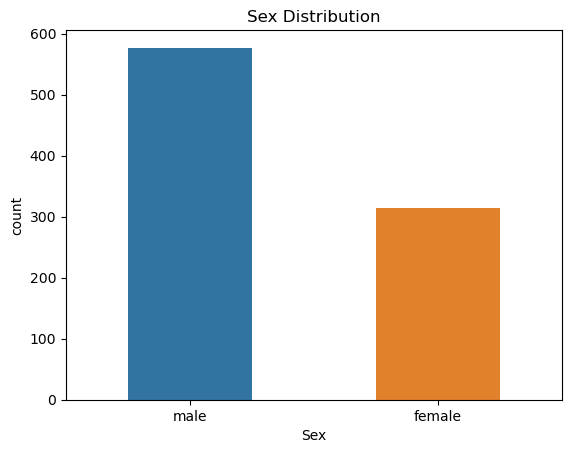

In [76]:
# Analyze 'Sex'

print("\nSex Distribution:\n", titanic_data_filled['Sex'].value_counts())

sns.countplot(x = 'Sex', data = titanic_data_filled, width = 0.5)

plt.title('Sex Distribution')

plt.show()


Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


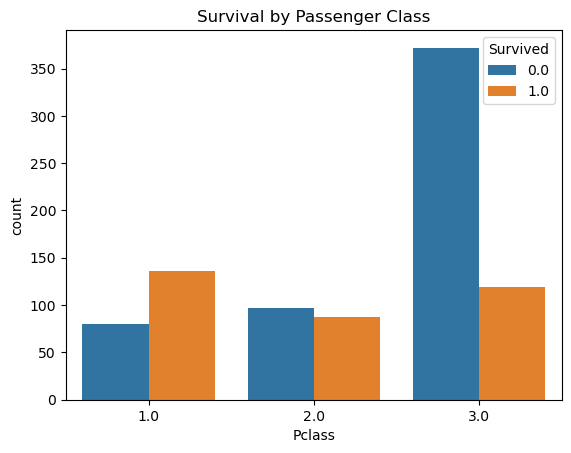

In [77]:
# Analyze Survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()


Survival by Gender:
 Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


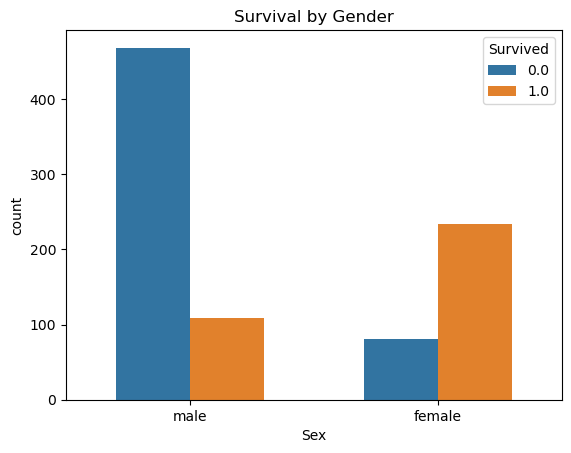

In [78]:
# Analyze survival based on gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('Sex')['Survived'].value_counts())

sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_data_filled, width = 0.6)

plt.title('Survival by Gender')

plt.show()


Survival by Age Group:
 Age_group  Survived
Child      0.0          80
           1.0          74
Adult      0.0         462
           1.0         267
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


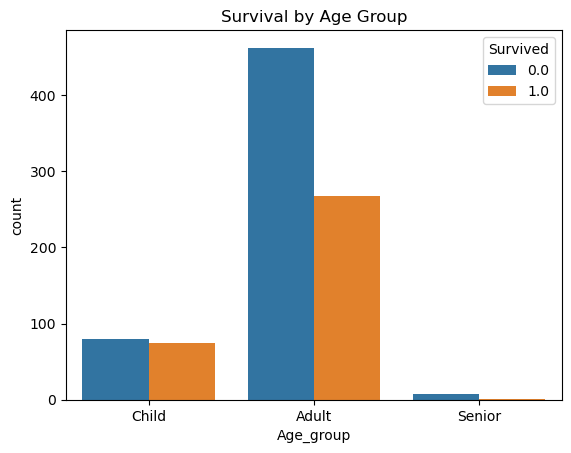

In [79]:
# Analyze survival based on age groups (create age bins)

titanic_data_filled['Age_group'] = pd.cut(titanic_data_filled['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('Age_group')['Survived'].value_counts())

sns.countplot(x = 'Age_group', hue = 'Survived', data = titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()


Survival by Gender and Class:
 Sex     Pclass  Survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


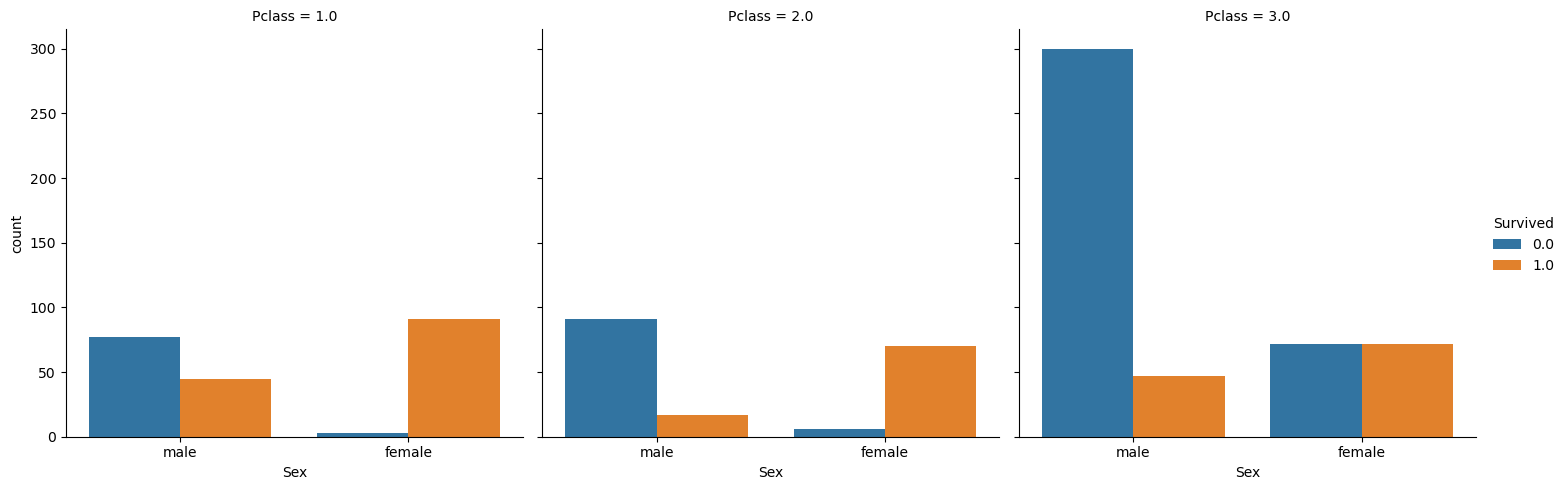

In [80]:
# Survival based on gender and class

print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['Sex', 'Pclass'])['Survived'].value_counts())

sns.catplot(x = 'Sex', hue = 'Survived', col = 'Pclass', kind = 'count', data = titanic_data_filled)

plt.show()

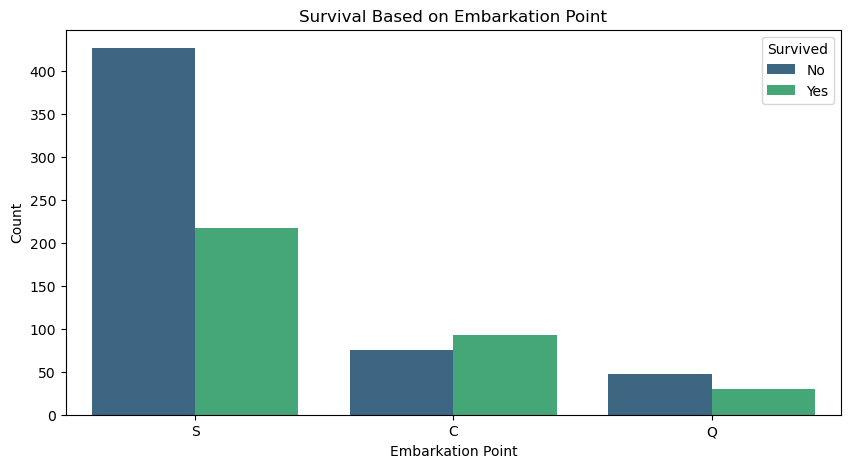

In [81]:
# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x = 'Embarked', hue = 'Survived', data = titanic, palette = 'viridis')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()


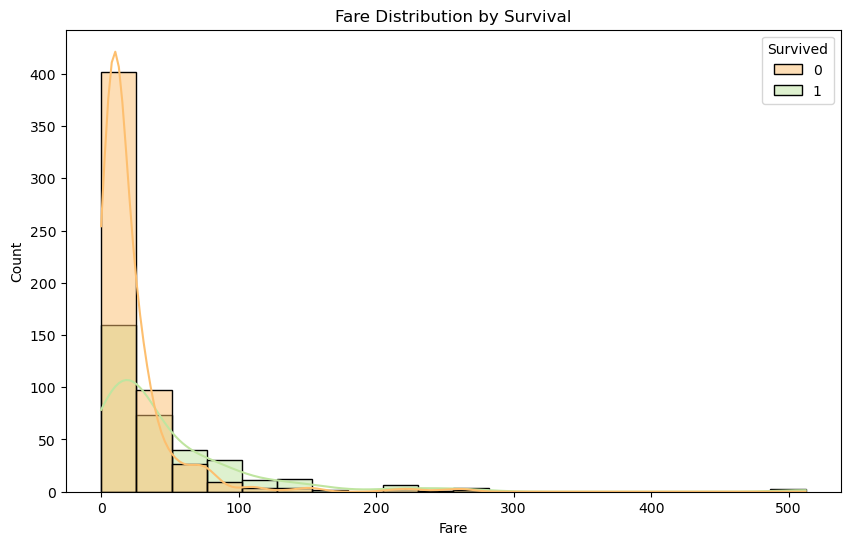

In [82]:
# Survival Based on Fare

plt.figure(figsize=(10, 6))

sns.histplot(titanic, x = 'Fare', hue = 'Survived', bins = 20, kde = True, palette = 'Spectral')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()


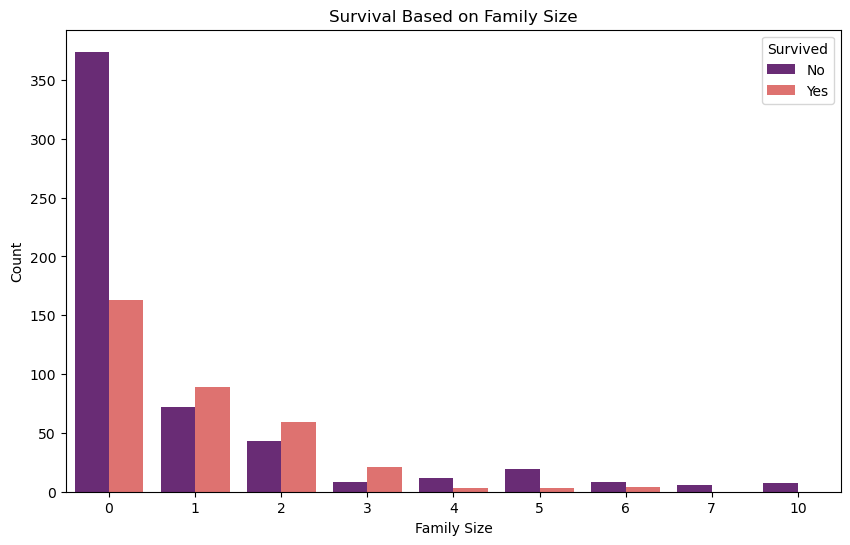

In [83]:
# Family Size Analysis

titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']



plt.figure(figsize=(10, 6))

sns.countplot(x = 'Family_size', hue = 'Survived', data = titanic, palette = 'magma')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [84]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

titanic['Age_group'] = pd.cut(titanic['Age'], bins = bins, labels = labels)

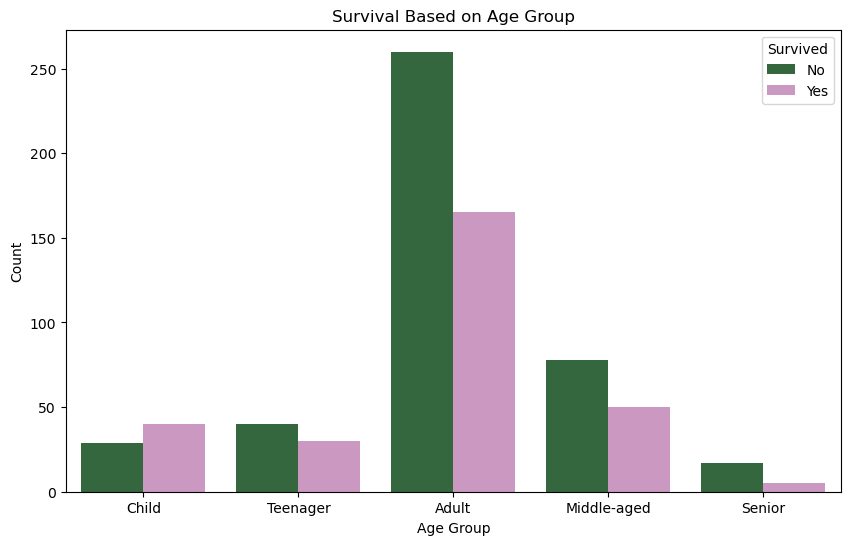

In [85]:
# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x = 'Age_group', hue = 'Survived', data = titanic, palette = 'cubehelix')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

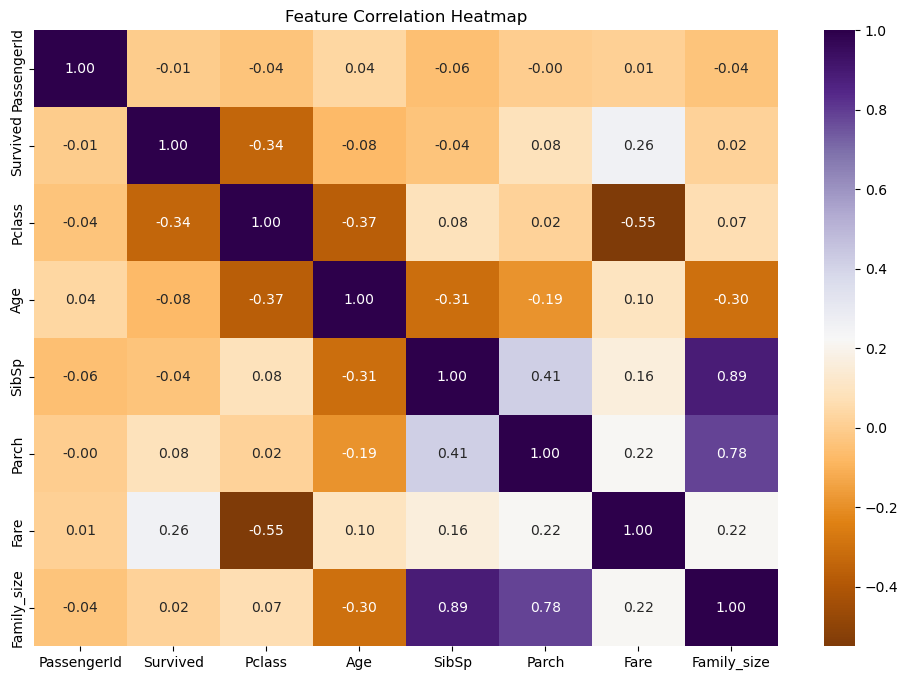

In [92]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='PuOr', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()